In [1]:
import polars as pl
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [2]:
df = pl.read_csv("../data/processed/cleaned_stress_data.csv", try_parse_dates=True)
df

date,time,wellbeing_level,scale_1_5,datetime,emotion_score,experiment_group,measurement_order
date,time,str,i64,datetime[μs],i64,str,i64
2025-06-09,03:00:00,"""Neutral""",3,2025-06-08 18:00:00,4,"""control""",2
2025-06-08,23:59:00,"""Pleasant""",4,2025-06-08 14:59:00,6,"""control""",1
2025-06-08,05:50:00,"""Pleasant""",4,2025-06-07 20:50:00,6,"""control""",2
2025-06-07,23:44:00,"""Very Pleasant""",5,2025-06-07 14:44:00,7,"""control""",1
2025-06-07,03:03:00,"""Slightly Pleasant""",4,2025-06-06 18:03:00,5,"""control""",2
…,…,…,…,…,…,…,…
2025-05-14,14:01:00,"""Neutral""",3,2025-05-14 14:01:00,4,"""treatment""",1
2025-05-13,18:00:00,"""Slightly Pleasant""",4,2025-05-13 18:00:00,5,"""treatment""",2
2025-05-13,14:00:00,"""Unpleasant""",2,2025-05-13 14:00:00,2,"""treatment""",1


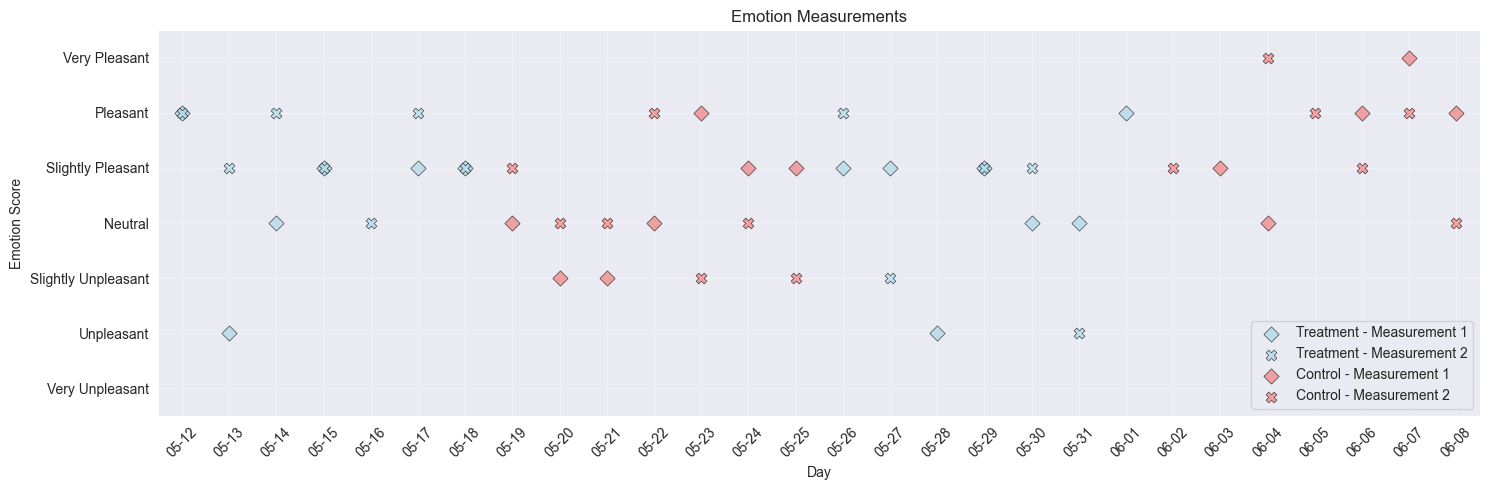

In [7]:
# Create scatter plot for emotion scores over time
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Extract data for plotting
dates = df["datetime"].dt.date().to_numpy()
emotion_scores = df["emotion_score"].to_numpy()
experiment_groups = df["experiment_group"].to_numpy()
measurement_orders = df["measurement_order"].to_numpy()

# Define markers for measurement order and colors for experiment groups
markers = {1: 'D', 2: 'X'}  # circle for first, diamond for second
colors = {'treatment': 'lightblue', 'control': 'lightcoral', 'outside_experiment': 'gray'}

# Create scatter plot with hue based on experiment group and markers for measurement order
for group in df["experiment_group"].unique():
    for order in df["measurement_order"].unique():
        mask = (experiment_groups == group) & (measurement_orders == order)
        ax.scatter(dates[mask], emotion_scores[mask],
                      label=f'{group.replace("_", " ").title()} - Measurement {order}', 
                      marker=markers[order], alpha=0.7, s=60, 
                      color=colors.get(group, 'gray'),
                      edgecolors='black', linewidth=0.5)

ax.set_xlabel('Day')
ax.set_ylabel('Emotion Score')
ax.set_title('Emotion Measurements')
ax.set_ylim(0.5, 7.5)
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right')

# Format x-axis
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim(dates.min() - np.timedelta64(12, 'h'), dates.max() + np.timedelta64(12, 'h'))
ax.tick_params(axis='x', rotation=45)

# Set y-axis ticks to show full emotion names
# Use the reverse mapping from load_and_clean_stress_data.ipynb
emotion_mapping = {
    7: "Very Pleasant",
    6: "Pleasant", 
    5: "Slightly Pleasant",
    4: "Neutral",
    3: "Slightly Unpleasant",
    2: "Unpleasant",
    1: "Very Unpleasant"
}

# Get the unique emotion scores present in the data
unique_scores = list(emotion_mapping.keys())
ax.set_yticks(unique_scores)
ax.set_yticklabels([emotion_mapping.get(score, f"Score {score}") for score in unique_scores])

plt.tight_layout()
plt.savefig("../figures/stress/emotion_scores_scatter_plot.png", dpi=300, bbox_inches='tight')
plt.show()

array(['2025-06-08', '2025-06-08', '2025-06-07', '2025-06-07',
       '2025-06-06', '2025-06-06', '2025-06-05', '2025-06-04',
       '2025-06-04', '2025-06-03', '2025-06-02', '2025-06-01',
       '2025-05-31', '2025-05-31', '2025-05-30', '2025-05-30',
       '2025-05-29', '2025-05-29', '2025-05-28', '2025-05-27',
       '2025-05-27', '2025-05-26', '2025-05-26', '2025-05-25',
       '2025-05-25', '2025-05-24', '2025-05-24', '2025-05-23',
       '2025-05-23', '2025-05-22', '2025-05-22', '2025-05-21',
       '2025-05-21', '2025-05-20', '2025-05-20', '2025-05-19',
       '2025-05-19', '2025-05-18', '2025-05-18', '2025-05-17',
       '2025-05-17', '2025-05-16', '2025-05-15', '2025-05-15',
       '2025-05-14', '2025-05-14', '2025-05-13', '2025-05-13',
       '2025-05-12', '2025-05-12'], dtype='datetime64[D]')